# 十二.图像几何变换之图像仿射变换、图像透视变换和图像校正

前面文章讲解了图像缩放、图像旋转、图像翻转和图像平移的几何变换，本篇文章主要讲解

1.图像仿射变换

2.图像透视变换

3.基于图像透视变换的图像校正

4.图像几何变换总结


## 12.1图像仿射变换

图像仿射变换又称为图像仿射映射，是指在几何中，一个向量空间进行一次线性变换并接上一个平移，变换为另一个向量空间。通常图像的旋转加上拉升就是图像仿射变换，仿射变换需要一个M矩阵实现，但是由于仿射变换比较复杂，很难找到这个M矩阵.

OpenCV提供了根据变换前后三个点的对应关系来自动求解M的函数——cv2.getAffineTransform(pos1,pos2)，其中pos1和pos2表示变换前后的对应位置关系，输出的结果为仿射矩阵M，接着使用函数cv2.warpAffine()实现图像仿射变换。图5-14是仿射变换的前后效果图。


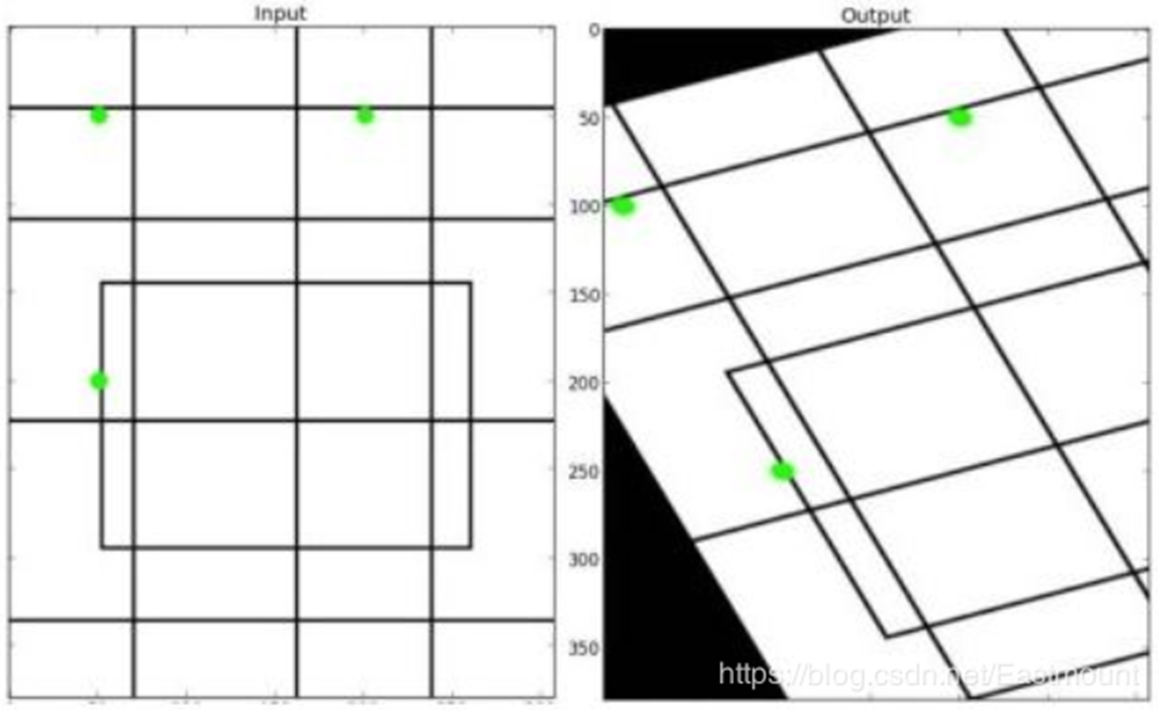

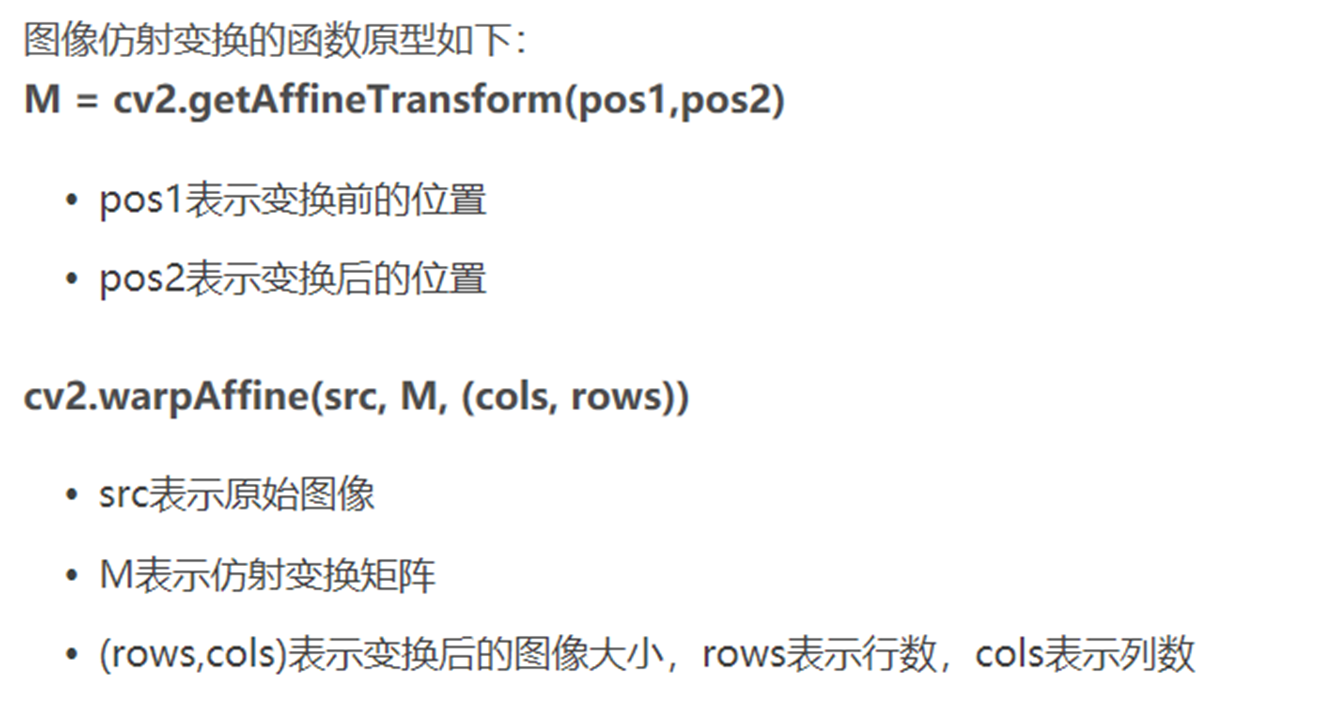

代码实现如下

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取图片
src = cv2.imread('test.jpg')

#获取图像大小
rows, cols = src.shape[:2]

#设置图像仿射变换矩阵
pos1 = np.float32([[50,50], [200,50], [50,200]])
pos2 = np.float32([[10,100], [200,50], [100,250]])
M = cv2.getAffineTransform(pos1, pos2)

#图像仿射变换
result = cv2.warpAffine(src, M, (cols, rows))

#显示图像
cv2.imshow("original", src)
cv2.imshow("result", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


## 12.2图像透视变换

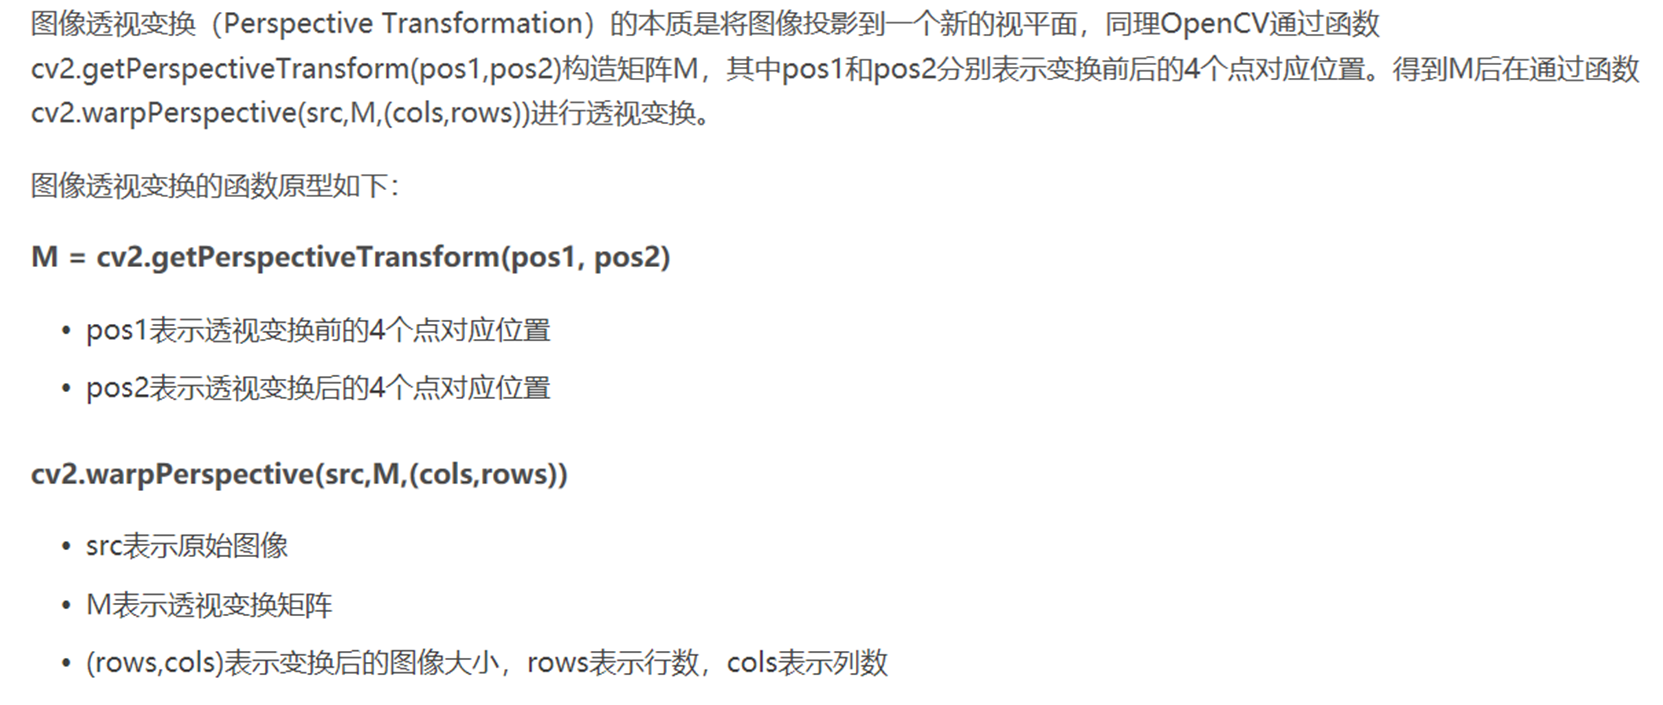

代码实现


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取图片
src = cv2.imread('test.jpg')

#获取图像大小
rows, cols = src.shape[:2]

#设置图像透视变换矩阵
pos1 = np.float32([[114, 82], [287, 156], [8, 322], [216, 333]])
pos2 = np.float32([[0, 0], [188, 0], [0, 262], [188, 262]])
M = cv2.getPerspectiveTransform(pos1, pos2)

#图像透视变换
result = cv2.warpPerspective(src, M, (190, 272))

#显示图像
cv2.imshow("original", src)
cv2.imshow("result", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


## 12.3基于图像透视变换的图像校正

假设现在存在一张A4纸图像，
现在需要通过调用
图像透视变换校正图像。

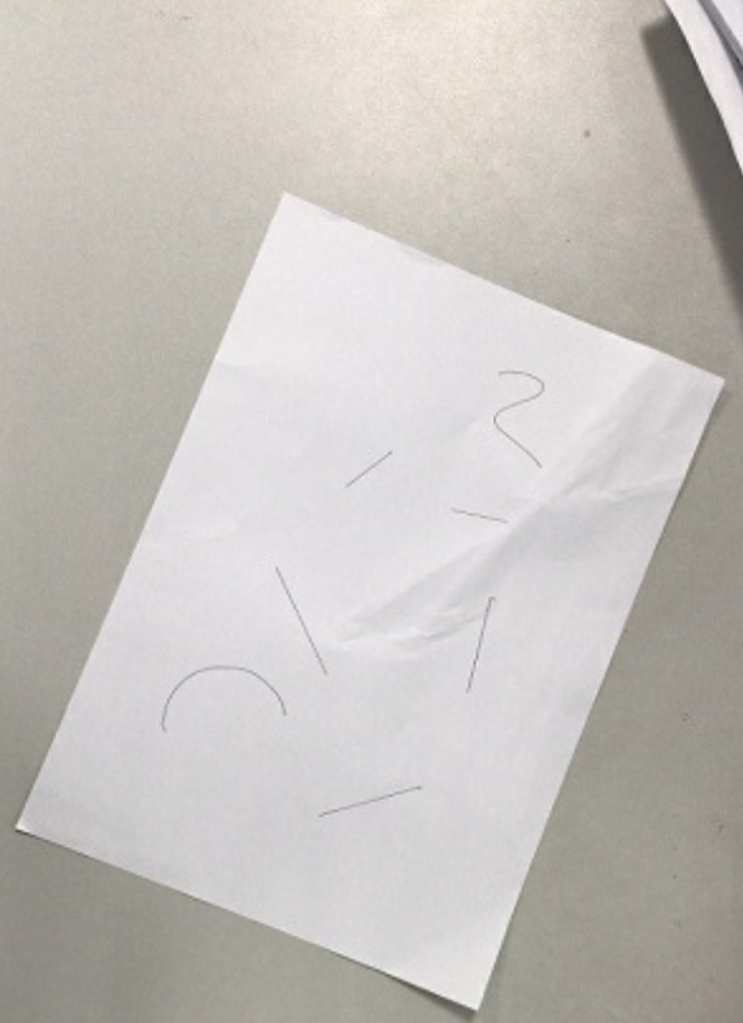

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取图片
src = cv2.imread('test01.jpg')

#获取图像大小
rows, cols = src.shape[:2]

#将源图像高斯模糊
img = cv2.GaussianBlur(src, (3,3), 0)
#进行灰度化处理
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#边缘检测（检测出图像的边缘信息）
edges = cv2.Canny(gray,50,250,apertureSize = 3)
cv2.imwrite("canny.jpg", edges)

#通过霍夫变换得到A4纸边缘
lines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength=90,maxLineGap=10)

#下面输出的四个点分别为四个顶点
for x1,y1,x2,y2 in lines[0]:
    print((x1,y1),(x2,y2))
for x1,y1,x2,y2 in lines[1]:
    print((x1,y1),(x2,y2))

#绘制边缘
for x1,y1,x2,y2 in lines[0]:
    cv2.line(gray, (x1,y1), (x2,y2), (0,0,255), 1)

#根据四个顶点设置图像透视变换矩阵
pos1 = np.float32([[114, 82], [287, 156], [8, 322], [216, 333]])
pos2 = np.float32([[0, 0], [188, 0], [0, 262], [188, 262]])
M = cv2.getPerspectiveTransform(pos1, pos2)

#图像透视变换
result = cv2.warpPerspective(src, M, (190, 272))

#显示图像
cv2.imshow("original", src)
cv2.imshow("result", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()

## 12.4图像几何变换总结

最后补充图像几何代码所有变换，
希望读者能体会下相关的代码，
并动手实践下。
输出结果以女神为例：


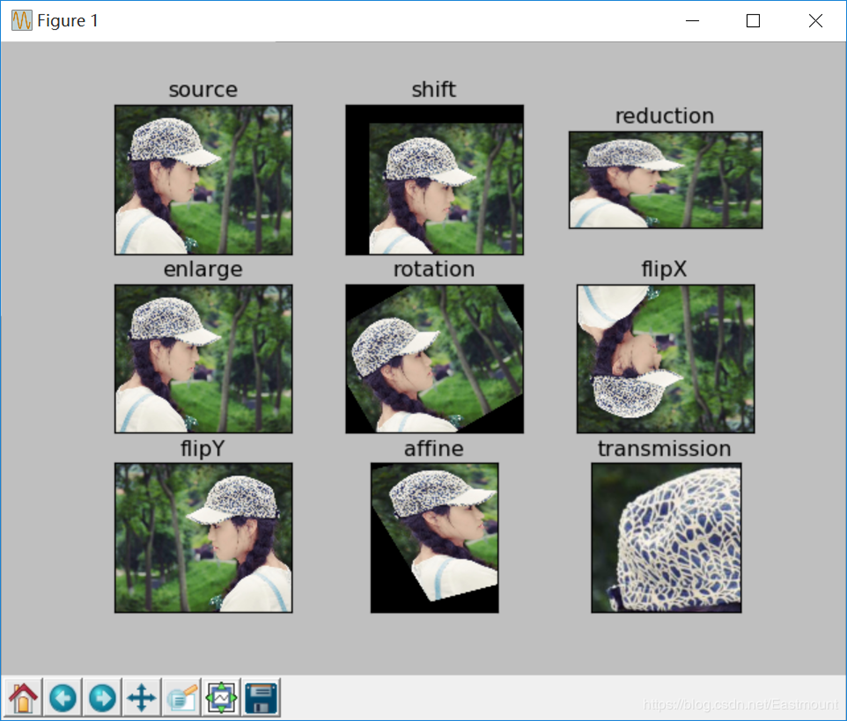

In [ ]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
 
#读取图片
img = cv2.imread('test.jpg')
image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#图像平移矩阵
M = np.float32([[1, 0, 80], [0, 1, 30]])
rows, cols = image.shape[:2]
img1 = cv2.warpAffine(image, M, (cols, rows))

#图像缩小
img2 = cv2.resize(image, (200,100))

#图像放大
img3 = cv2.resize(image, None, fx=1.1, fy=1.1)

#绕图像的中心旋转
#源图像的高、宽 以及通道数
rows, cols, channel = image.shape
#函数参数：旋转中心 旋转度数 scale
M = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1) 
#函数参数：原始图像 旋转参数 元素图像宽高
img4 = cv2.warpAffine(image, M, (cols, rows))

#图像翻转
img5 = cv2.flip(image, 0)   #参数=0以X轴为对称轴翻转 
img6 = cv2.flip(image, 1)   #参数>0以Y轴为对称轴翻转

#图像的仿射
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
img7 = cv2.warpAffine(image, M, (rows,cols))

#图像的透射
pts1 = np.float32([[56,65],[238,52],[28,237],[239,240]])
pts2 = np.float32([[0,0],[200,0],[0,200],[200,200]])
M = cv2.getPerspectiveTransform(pts1,pts2)
img8 = cv2.warpPerspective(image,M,(200,200))


#循环显示图形
titles = [ 'source', 'shift', 'reduction', 'enlarge', 'rotation', 'flipX', 'flipY', 'affine', 'transmission']  
images = [image, img1, img2, img3, img4, img5, img6, img7, img8]  
for i in range(9):  
   plt.subplot(3, 3, i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  
